<a href="https://colab.research.google.com/github/mohameds277/Computer-Vision-/blob/main/Introduction_to_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Computer Vision**

Computer vision is a multidisciplinary field that enables machines to interpret and
understand visual data, such as images and videos. In this experiment, we explore
different fields of computer vision, starting with basics of image manipulation, and
going to more advanced problems such as object recognition and detection. We will
mainly use OpenCV, Scikit-learn, and PyTorch Python packages for the procedure
of this experiment. Parts of this experiment is based on PyTorch tutorials.

# 1.1 Image processing and manipulation with OpenCV

In this part, we will gain a foundational understanding of image processing and manipulation using the OpenCV library in Python.

In the following sections, we will use the Birzeit University campus picture shown
in Figure 1.1 as an example.

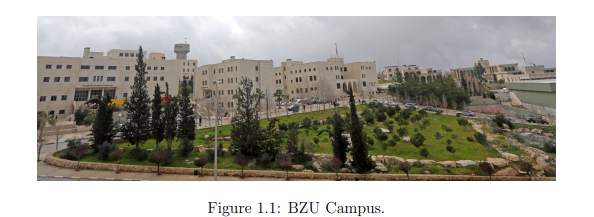

In [ ]:
!wget https://www.birzeit.edu/sites/default/files/buildings.jpg

--2024-01-16 11:22:26--  https://www.birzeit.edu/sites/default/files/buildings.jpg
Resolving www.birzeit.edu (www.birzeit.edu)... 104.22.8.107, 172.67.38.181, 104.22.9.107, ...
Connecting to www.birzeit.edu (www.birzeit.edu)|104.22.8.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258627 (253K) [image/jpeg]
Saving to: ‘buildings.jpg’

buildings.jpg       100%[===================>] 252.57K  --.-KB/s    in 0.01s   

2024-01-16 11:22:26 (18.6 MB/s) - ‘buildings.jpg’ saved [258627/258627]



## Loading and displaying an image

To load the image we downloaded to numpy array and display it

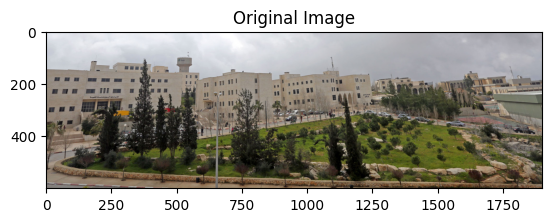

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt


# Load an image
image = cv.imread('buildings.jpg')
# Display the image
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

### Task 1
What is the shape of the loaded image? What does each dimension represent?

In [ ]:
print(image.shape)

(600, 1900, 3)


using the shape functon , the output as appers above is (600 , 1900 , 3 )

breaking down the output :

* 600 is the height of the image .
* 1900 is the width of the image .
* 3 is the number of channels in the image meaning that the image is an RGB image



---



### Task 2
repeat the previous code but now pass the image directly to plt.imshow().
I.e., without using cv.cvtColor(). Do you notice any difference? Why?

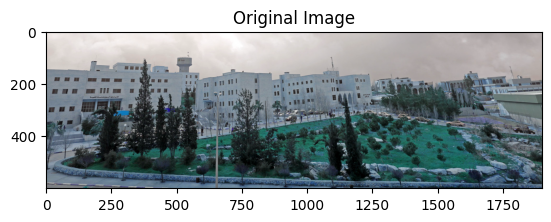

In [ ]:
# Load an image
image = cv.imread('buildings.jpg')
# Display the image
plt.imshow(image)
plt.title('Original Image')
plt.show()

the image is in the BGR color space  , the reason behind this , is the way the OPENCV library works , when the image is assigned using this library it format will be converted into numpy array , and stored in BGR color space .



---



## Grayscale conversion

To convert the image in the previous section into grayscale

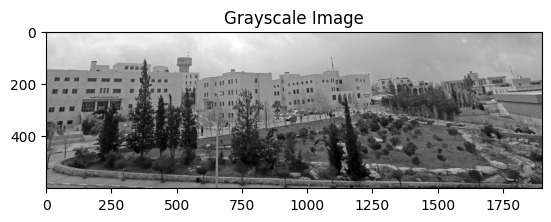

In [ ]:
# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

### Task 3
What is the shape of the gray image? What does each dimension represent?

In [ ]:
print(gray_image.shape)

(600, 1900)


1900X600

1900 : width , 600 : hight



---



## Image transformation

ransformations on the image

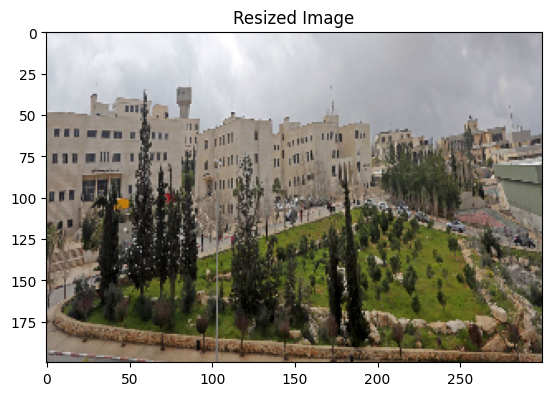

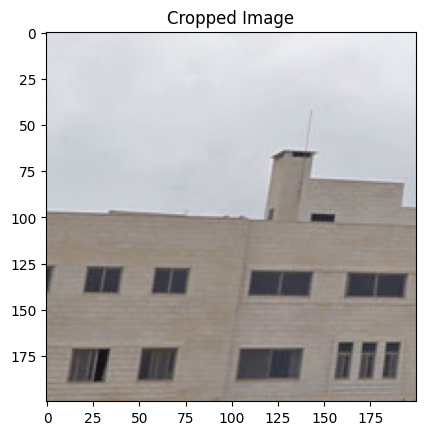

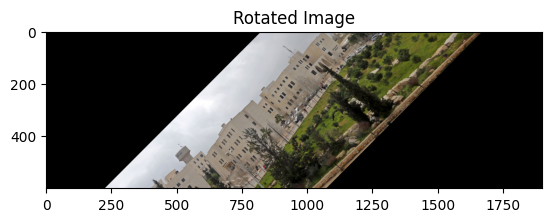

In [ ]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Resize and crop the image
resized_image = cv.resize(image, (300, 200))
#cropped image
cropped_image = image[50:250, 50:250]
# Rotate the image
rows, cols = image.shape[:2]


M = cv.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))
# Display the transformed images
plt.imshow(resized_image)
plt.title('Resized Image')
plt.show()
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

### Task 4
Rotate the original image by 10 degrees counter-clockwise around the upperleft corner of the image.

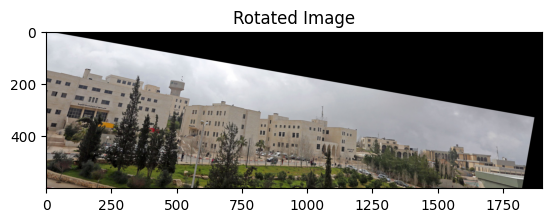

In [ ]:
# Rotate the image by 10 degrees counter-clockwise around the upper-left corner
rows, cols = image.shape[:2]
angle = 10


M = cv.getRotationMatrix2D((0, 0), -angle, 1)


rotated_image = cv.warpAffine(image, M, (cols, rows))

plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()



---



## Gaussian blurring

Gaussian blurring is used to reduce the noise in the image. However, it also affects the
details of the input image. The basic idea is to convolve the image with a Gaussian
kernel, which is a 2D bell-shaped function. The following code can be used to apply
Gaussian blurring

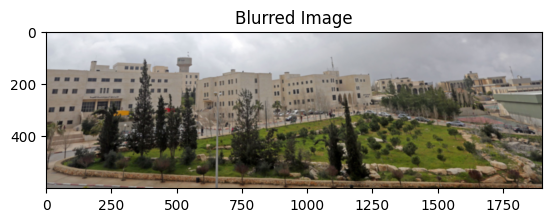

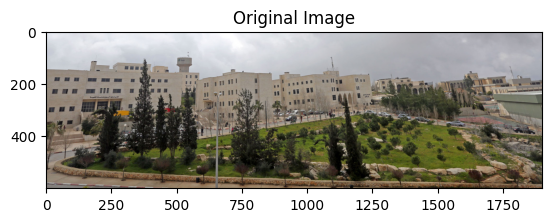

In [ ]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (7, 7), 0)
# Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()
plt.imshow(image)
plt.title('Original Image')
plt.show()

### Task 5
What does (7, 7) in the previous code represent? try to increase this value,
what do you notice?

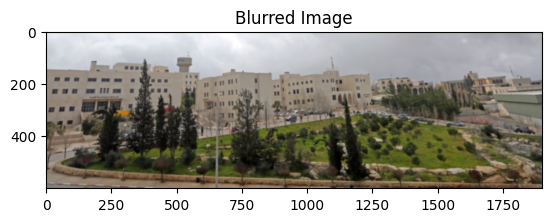

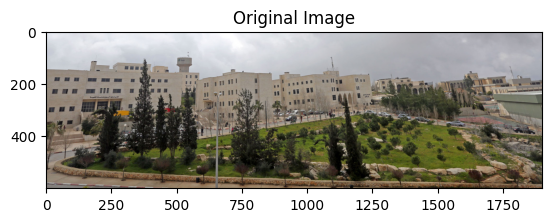

In [ ]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (9, 9), 0)
# Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()
plt.imshow(image)
plt.title('Original Image')
plt.show()

the parameter is the kernal size , and as noticed that the kernal size must be an odd number , even numbers will trigger an assertion error , increasing the value of the kernal size will increase the gaussian smoothing and furthermore will decrease the image details .



---



## Edge detection

To detect edges in the image, run the following code

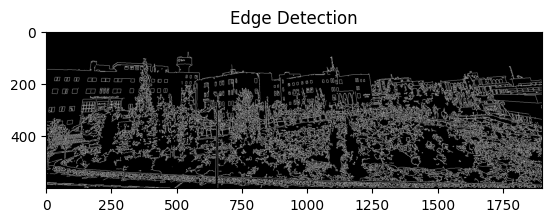

In [ ]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 150)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

### Task 6
Explain the parameters of cv.Canny(). How do they affect the results?

* Parameter 1 : input image , since canny detection algorthim only works with gray-scaled images.
* Parameter 2 : Lower-Threshold value .
* Parameter 3 : Upper-Threshold value .
these pararmeters affects the algorthm by how it can detects the edges in the image.



---



# 1.2 Image Classification / Object Recognition

Image classification is a fundamental task in computer vision. The goal of image
classification is to assign a single label for an input image. Typically, the image
contains only one object, and the goal is to recognize which object is depicted in the
image.
For this lab, we will use the CIFAR10 dataset, which is a standard benchmark for image classification. The dataset consists of 10 classes: ‘airplane’, ‘automobile’, ‘bird’,
‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. Each image in CIFAR10 are of size
3 × 32 × 32, i.e. 3-channel color images of of size 32 × 32 pixels.

## 1.2.1 Image classification with MLP

In this section, we will train an MLP classifier on CIFAR10 dataset. Let’s start by
loading the dataset. Luckiley, PyTorch has a package called torchvision, that has
data loaders for common datasets including CIFAR10, and data transformers for images torchvision.datasets and torch.utils.data.DataLoader.

### Loading images

The first step is to load and normalize the CIFAR10 training and test images using
torchvision.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


#transfomr from (Width , height , channels) format into ( channel , height , width)   ranges from (0 to 1)
transform = transforms.Compose(
[transforms.ToTensor(), #(image - mean) / std
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


The output of torchvision datasets are PILImage images of range [0, 1]. We transform
them to Tensors of normalized range [-1, 1]. The following code shows some of the
training images.

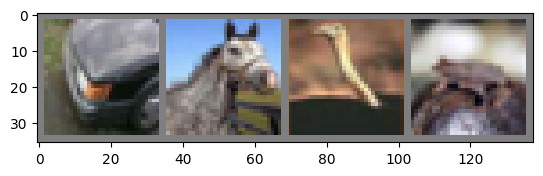

car   horse bird  frog 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()
  # get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
  # show images
imshow(torchvision.utils.make_grid(images))
  # print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


### Task 7
Explain the effect of the following transforms transforms.ToTensor(), and
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).

*  transforms.ToTensor()  is used to transfomr from (Width , height , channels) format into ( channel , height , width)   ranges from (0 to 1) ,
* transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)). is used to normalize each channel of the pixels where each channel will have mean value of 0.5 and standarad diviation of 0.5 , first pararmeter is the mean value of the RGB channels , while the second parameters are the STD values of each channel



---



### Task 8
What is the purpose of the following line: np.transpose(npimg, (1, 2, 0))?

to transpose the shape of the image that was converted to fit in the tesor data strucutre , into the numpy matpolic format which is ( width , height , channels ) , if this step is ignored an error of invalid shpaes values will be triggered .



---



## Defining the network

Let’s define a simple MLP. This network is the same as the MLP from experiment 7,
except for the input layer, which has more inputs.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(3072, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 10)


  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  # Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)

cpu


Net(
  (fc1): Linear(in_features=3072, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

## Define a Loss function and optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)


## Train the network

In [ ]:
net.train()
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
  # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
        # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    # print statistics
    running_loss += loss.item()

    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /   2000:.3f}')
      running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.726
[1,  4000] loss: 1.684
[1,  6000] loss: 1.644
[1,  8000] loss: 1.643
[1, 10000] loss: 1.629
[1, 12000] loss: 1.608
[2,  2000] loss: 1.554
[2,  4000] loss: 1.531
[2,  6000] loss: 1.549
[2,  8000] loss: 1.532
[2, 10000] loss: 1.547
[2, 12000] loss: 1.534
Finished Training


## Test the network on the test data

We have trained the network for 2 passes over the training dataset. But we need to
check if the network has learnt anything at all.
We will check this by predicting the class label that the neural network outputs, and
checking it against the ground-truth. If the prediction is correct, we add the sample
to the list of correct predictions.`

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs

net.eval()
with torch.no_grad():

  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 45 %


### Task 9
For the first layer in the MLP (self.fc1 = nn.Linear(3072, 64) ), what does
the number 3072 represent?

it represents the first input features  to the network , the data set we used is images data set , and these images are in RGB color space format , so this number is exaclty 32X32X3



---



## 1.2.2 Image classification with CNNs

In the previous section, we used a MLP to classifiy images. However, for this type
of data, convolutional neural networks (CNNs) are a better choice. Convolutional
Neural Networks (CNNs) are a class of deep learning models designed specifically for
processing structured grid data, such as images. The key innovation of CNNs lies
in their ability to automatically and adaptively learn hierarchical representations of
input data. The fundamental building blocks of CNNs are convolutional layers, which
apply convolution operations to the input data. Convolution involves sliding a small
filter (also called a kernel) across the input, performing element-wise multiplications,
and aggregating the results to create a feature map.
CNNs excel at capturing spatial hierarchies and local patterns within the input
data. Convolutional layers are typically followed by activation functions (e.g., ReLU)
to introduce non-linearity and pooling layers to downsample the spatial dimensions,
reducing the computational load and preserving important features. The final layers
of a CNN typically include fully connected layers to make predictions based on the
learned hierarchical representations. CNNs have proven highly effective in various
computer vision tasks, such as image classification, object detection, and image segmentation, due to their ability to automatically learn relevant features from raw pixel
data. Figure 1.2 shows the general architecture of CNNs.

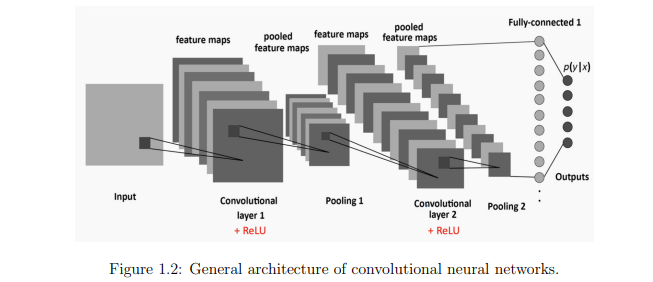

As shown in the figure, CNNs usually contains three types of layes:

* Convolutional Layer: The convolutional layer is the core building block of a
CNN. It applies convolution operations to the input data using filters or kernels.
These filters slide over the input, performing element-wise multiplications and
aggregating the results to create feature maps. This process allows the network
to automatically learn spatial hierarchies and local patterns, capturing relevant
features in the input data. Figure 1.3 shows a convolutional layer with 2 filters.

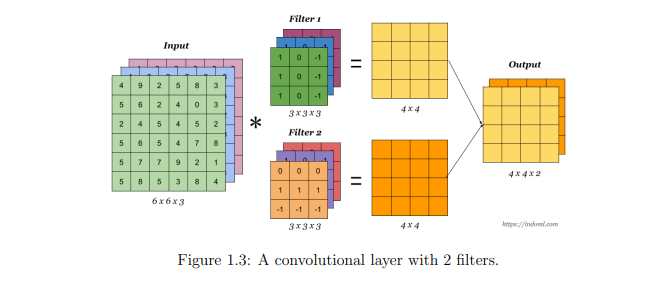

* Pooling Layer: Pooling layers are used to downsample the spatial dimensions
of the feature maps generated by the convolutional layers. Max pooling and average pooling are common techniques, where the operation involves taking
the maximum or average value from a group of neighboring pixels. Pooling
helps reduce the computational complexity of the network, makes the learned
features more invariant to small translations, and retains the most important
information. Figure 1.4 shows both the max and average pooling operations.

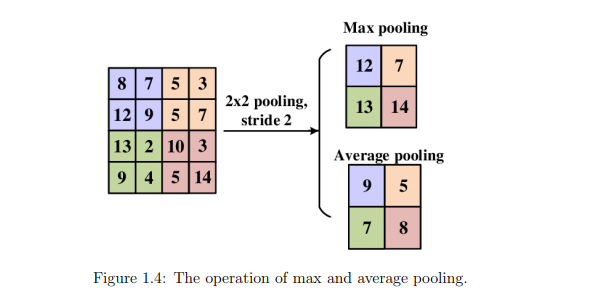

* Fully Connected Layer: Fully connected layers, also known as dense layers, are
traditionally found at the end of the CNN architecture. Neurons in a fully
connected layer connect to all the neurons in the previous layer, effectively creating a dense matrix of connections. These layers are responsible for combining
the high-level features learned by the convolutional layers to make final predictions or classifications. In image classification tasks, the output of the last
fully connected layer is often fed into a softmax activation function to produce
probability scores for different classes.

Let’s now train a simple CNN to classify images from CIFAR10 dataset. Repreat
the procedure from the previous section but replace the network with the CNN defined in the following code snippet. Note that CNNs expects a 3-dimensional tensor
at the input, which means that we have to pass the input image without flattening
both during training and testing. Make sure that you adjust the code from the previous section accordingly.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NetCNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x))) #14 input size
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = NetCNN()
print(device)
net = net.to(device)

NameError: name 'device' is not defined

### Task 10
Study the CNN code and answer the following questions:
- How many layers does the network have?

6 Layers , input to conv1 layer , conv1  to pooling 1 layer , pooling1 to conv2 layer , pooling2 to NN layer , NN layer to output layer.



- What does the parameters of nn.Conv2d represent?



- What does the parameters of nn.MaxPool2d represent?
- In the first linear layer, what does the number 16 * 5 * 5 represent? How to obtain
this number?